# SP500 Price, Volume, Volatility Model

These include S&P500 Price, Volume, Volatility data

In [1]:
import pandas as pd

df_sp500 = pd.read_csv('./Inputs/SP500_data.csv')
df_sp500

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,1/3/1928,17.76,17.76,17.76,17.76,17.76,-
1,1/4/1928,17.72,17.72,17.72,17.72,17.72,-
2,1/5/1928,17.55,17.55,17.55,17.55,17.55,-
3,1/6/1928,17.66,17.66,17.66,17.66,17.66,-
4,1/9/1928,17.5,17.5,17.5,17.5,17.5,-
...,...,...,...,...,...,...,...
23599,12/13/2021,"4,710.30","4,710.30","4,667.60","4,668.97","4,668.97","3,322,050,000"
23600,12/14/2021,"4,642.99","4,660.47","4,606.52","4,634.09","4,634.09","3,292,740,000"
23601,12/15/2021,"4,636.46","4,712.60","4,611.22","4,709.85","4,709.85","3,367,580,000"
23602,12/16/2021,"4,719.13","4,731.99","4,651.89","4,668.67","4,668.67","3,592,810,000"


In [2]:
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])

In [3]:
dict = {'Close*':'Close',
       'Adj Close**':'Adj_Close'}

df_sp500.rename(columns=dict,inplace=True)

In [4]:
df_sp500 = df_sp500.replace(',','',regex=True)
df_sp500 = df_sp500.replace('-','',regex=True)

In [5]:
df_sp500[['Open','High','Low','Close','Adj_Close','Volume']] = df_sp500[['Open','High','Low','Close','Adj_Close','Volume']].apply(pd.to_numeric)

In [6]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23604 entries, 0 to 23603
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23604 non-null  datetime64[ns]
 1   Open       23604 non-null  float64       
 2   High       23604 non-null  float64       
 3   Low        23604 non-null  float64       
 4   Close      23604 non-null  float64       
 5   Adj_Close  23604 non-null  float64       
 6   Volume     18109 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.3 MB


In [7]:
df_sp500['pct_dif_1'] = ''
df_sp500['price_days'] = ''
df_sp500['ch_cl'] = ''
df_sp500['ch_pc'] = ''
df_sp500['cl_pc'] = ''
df_sp500['true_range'] = ''
df_sp500['atr'] = ''
df_sp500['atr_pct'] = ''
df_sp500['atr_days'] = ''
df_sp500['avg_volume'] = ''
df_sp500['volume_pct'] = ''
df_sp500['volume_days'] = ''

for x in range(len(df_sp500.index)):
    if x > 0:
        df_sp500['pct_dif_1'][x] = ( df_sp500['Close'][x] - df_sp500['Close'][x-1] ) / df_sp500['Close'][x]
        df_sp500['ch_cl'][x] = abs(df_sp500['High'][x]-df_sp500['Low'][x])
        df_sp500['ch_pc'][x] = abs(df_sp500['High'][x]-df_sp500['Close'][x-1])
        df_sp500['cl_pc'][x] = abs(df_sp500['Low'][x]-df_sp500['Close'][x-1])
        df_sp500['true_range'][x] = max(df_sp500['ch_cl'][x],df_sp500['ch_pc'][x],df_sp500['cl_pc'][x])
#     if x > 19:
#         print(f'True range is of type: {type(df_sp500["true_range"][x])}')
#         df_sp500['atr'][x] = (df_sp500.true_range.rolling(20)).mean()
#         print(f'ATR is of type: {type(df_sp500["atr"][x])}')
#         df_sp500['atr_pct'][x] = (df_sp500['atr'][x])/(df_sp500['Close'][x])
#     if x > 20:
#         if df_sp500['atr_pct'][x] > df_sp500['atr_pct'][x-1]:
#             df_sp500['atr_days'][x] = df_sp500['atr_days'][x-1] + 1
#         else:
#             df_sp500['atr_days'][x] = 1
#     if x > 59:
#         df_sp500['avg_volume'][x] = df_sp500['Volume'].astype(str).astype(float).rolling(60)
#         df_sp500['volume_pct'][x] = ( df_sp500['Volume'] - df_sp500['avg_volume'] ) / df_sp500['avg_volume']
#     if x > 60:
#         if df_sp500['volume_pct'][x] > df_sp500['volume_pct'][x-1]:
#             df_sp500['volume_days'][x] = df_sp500['volume_days'][x-1] + 1
#         else:
#             df_sp500['volume_days'][x] = 1

C:\Users\srobi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\srobi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\srobi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\srobi\anaconda3\en

In [8]:
df_sp500

,Date,Open,High,Low,Close,Adj_Close,Volume,pct_dif_1,price_days,ch_cl,ch_pc,cl_pc,true_range,atr,atr_pct,atr_days,avg_volume,volume_pct,volume_days
0,1928-01-03,17.76,17.76,17.76,17.76,17.76,NaN,,,,,,,,,,,,
1,1928-01-04,17.72,17.72,17.72,17.72,17.72,NaN,-0.00225734,,0,0.04,0.04,0.04,,,,,,
2,1928-01-05,17.55,17.55,17.55,17.55,17.55,NaN,-0.00968661,,0,0.17,0.17,0.17,,,,,,
3,1928-01-06,17.66,17.66,17.66,17.66,17.66,NaN,0.00622877,,0,0.11,0.11,0.11,,,,,,
4,1928-01-09,17.50,17.50,17.50,17.50,17.50,NaN,-0.00914286,,0,0.16,0.16,0.16,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23599,2021-12-13,4710.30,4710.30,4667.60,4668.97,4668.97,3.322050e+09,-0.00922045,,42.7,1.72,44.42,44.42,,,,,,
23600,2021-12-14,4642.99,4660.47,4606.52,4634.09,4634.09,3.292740e+09,-0.00752683,,53.95,8.5,62.45,62.45,,,,,,
23601,2021-12-15,4636.46,4712.60,4611.22,4709.85,4709.85,3.367580e+09,0.0160854,,101.38,78.51,22.87,101.38,,,,,,
23602,2021-12-16,4719.13,4731.99,4651.89,4668.67,4668.67,3.592810e+09,-0.0088205,,80.1,22.14,57.96,80.1,,,,,,


In [9]:
df_sp500[['pct_dif_1','price_days','true_range','atr_days','volume_pct']] = df_sp500[['pct_dif_1','price_days','true_range','atr_days','volume_pct']].apply(pd.to_numeric)

In [10]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23604 entries, 0 to 23603
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         23604 non-null  datetime64[ns]
 1   Open         23604 non-null  float64       
 2   High         23604 non-null  float64       
 3   Low          23604 non-null  float64       
 4   Close        23604 non-null  float64       
 5   Adj_Close    23604 non-null  float64       
 6   Volume       18109 non-null  float64       
 7   pct_dif_1    23603 non-null  float64       
 8   price_days   0 non-null      float64       
 9   ch_cl        23604 non-null  object        
 10  ch_pc        23604 non-null  object        
 11  cl_pc        23604 non-null  object        
 12  true_range   23603 non-null  float64       
 13  atr          23604 non-null  object        
 14  atr_pct      23604 non-null  object        
 15  atr_days     0 non-null      float64       
 16  avg_

In [11]:
df_sp500['atr'] = df_sp500['true_range'].rolling(20).mean()
df_sp500['avg_volume'] = df_sp500['Volume'].rolling(60).mean()
df_sp500

,Date,Open,High,Low,Close,Adj_Close,Volume,pct_dif_1,price_days,ch_cl,ch_pc,cl_pc,true_range,atr,atr_pct,atr_days,avg_volume,volume_pct,volume_days
0,1928-01-03,17.76,17.76,17.76,17.76,17.76,NaN,NaN,NaN,,,,NaN,NaN,,NaN,NaN,NaN,
1,1928-01-04,17.72,17.72,17.72,17.72,17.72,NaN,-0.002257,NaN,0,0.04,0.04,0.04,NaN,,NaN,NaN,NaN,
2,1928-01-05,17.55,17.55,17.55,17.55,17.55,NaN,-0.009687,NaN,0,0.17,0.17,0.17,NaN,,NaN,NaN,NaN,
3,1928-01-06,17.66,17.66,17.66,17.66,17.66,NaN,0.006229,NaN,0,0.11,0.11,0.11,NaN,,NaN,NaN,NaN,
4,1928-01-09,17.50,17.50,17.50,17.50,17.50,NaN,-0.009143,NaN,0,0.16,0.16,0.16,NaN,,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23599,2021-12-13,4710.30,4710.30,4667.60,4668.97,4668.97,3.322050e+09,-0.009220,NaN,42.7,1.72,44.42,44.42,62.8445,,NaN,3.134230e+09,NaN,
23600,2021-12-14,4642.99,4660.47,4606.52,4634.09,4634.09,3.292740e+09,-0.007527,NaN,53.95,8.5,62.45,62.45,64.7390,,NaN,3.126214e+09,NaN,
23601,2021-12-15,4636.46,4712.60,4611.22,4709.85,4709.85,3.367580e+09,0.016085,NaN,101.38,78.51,22.87,101.38,68.0315,,NaN,3.131602e+09,NaN,
23602,2021-12-16,4719.13,4731.99,4651.89,4668.67,4668.67,3.592810e+09,-0.008820,NaN,80.1,22.14,57.96,80.10,71.1820,,NaN,3.136921e+09,NaN,


In [12]:
for x in range(len(df_sp500.index)):
    if x > 1:
        if df_sp500['pct_dif_1'][x] > df_sp500['pct_dif_1'][x-1]:
            df_sp500['price_days'][x] = df_sp500['price_days'][x-1] + 1
        else:
            df_sp500['price_days'][x] = 1
    if x > 19:
#         print(f'True range is of type: {type(df_sp500["true_range"][x])}')
#         df_sp500['atr'][x] = (df_sp500.true_range.rolling(20)).mean()
#         print(f'ATR is of type: {type(df_sp500["atr"][x])}')
        df_sp500['atr_pct'][x] = (df_sp500['atr'][x])/(df_sp500['Close'][x])
    if x > 20:
        if df_sp500['atr_pct'][x] > df_sp500['atr_pct'][x-1]:
            df_sp500['atr_days'][x] = df_sp500['atr_days'][x-1] + 1
        else:
            df_sp500['atr_days'][x] = 1
    if x > 59:
#         df_sp500['avg_volume'][x] = df_sp500['Volume'].astype(str).astype(float).rolling(60)
        df_sp500['volume_pct'][x] = ( df_sp500['Volume'][x] - df_sp500['avg_volume'][x] ) / df_sp500['avg_volume'][x]
    if x > 60:
        if df_sp500['volume_pct'][x] > df_sp500['volume_pct'][x-1]:
            df_sp500['volume_days'][x] = df_sp500['volume_days'][x-1] + 1
        else:
            df_sp500['volume_days'][x] = 1

C:\Users\srobi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\srobi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\srobi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is ad

In [13]:
df_sp500

,Date,Open,High,Low,Close,Adj_Close,Volume,pct_dif_1,price_days,ch_cl,ch_pc,cl_pc,true_range,atr,atr_pct,atr_days,avg_volume,volume_pct,volume_days
0,1928-01-03,17.76,17.76,17.76,17.76,17.76,NaN,NaN,NaN,,,,NaN,NaN,,NaN,NaN,NaN,
1,1928-01-04,17.72,17.72,17.72,17.72,17.72,NaN,-0.002257,NaN,0,0.04,0.04,0.04,NaN,,NaN,NaN,NaN,
2,1928-01-05,17.55,17.55,17.55,17.55,17.55,NaN,-0.009687,1.0,0,0.17,0.17,0.17,NaN,,NaN,NaN,NaN,
3,1928-01-06,17.66,17.66,17.66,17.66,17.66,NaN,0.006229,2.0,0,0.11,0.11,0.11,NaN,,NaN,NaN,NaN,
4,1928-01-09,17.50,17.50,17.50,17.50,17.50,NaN,-0.009143,1.0,0,0.16,0.16,0.16,NaN,,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23599,2021-12-13,4710.30,4710.30,4667.60,4668.97,4668.97,3.322050e+09,-0.009220,1.0,42.7,1.72,44.42,44.42,62.8445,0.01346,3.0,3.134230e+09,0.059925,3
23600,2021-12-14,4642.99,4660.47,4606.52,4634.09,4634.09,3.292740e+09,-0.007527,2.0,53.95,8.5,62.45,62.45,64.7390,0.0139702,4.0,3.126214e+09,0.053268,1
23601,2021-12-15,4636.46,4712.60,4611.22,4709.85,4709.85,3.367580e+09,0.016085,3.0,101.38,78.51,22.87,101.38,68.0315,0.0144445,5.0,3.131602e+09,0.075354,2
23602,2021-12-16,4719.13,4731.99,4651.89,4668.67,4668.67,3.592810e+09,-0.008820,1.0,80.1,22.14,57.96,80.10,71.1820,0.0152467,6.0,3.136921e+09,0.145330,3


In [14]:
df_sp500_original = df_sp500[['Date','Open','High','Low','Close','Adj_Close','Volume','pct_dif_1']]

In [15]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23604 entries, 0 to 23603
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         23604 non-null  datetime64[ns]
 1   Open         23604 non-null  float64       
 2   High         23604 non-null  float64       
 3   Low          23604 non-null  float64       
 4   Close        23604 non-null  float64       
 5   Adj_Close    23604 non-null  float64       
 6   Volume       18109 non-null  float64       
 7   pct_dif_1    23603 non-null  float64       
 8   price_days   23602 non-null  float64       
 9   ch_cl        23604 non-null  object        
 10  ch_pc        23604 non-null  object        
 11  cl_pc        23604 non-null  object        
 12  true_range   23603 non-null  float64       
 13  atr          23584 non-null  float64       
 14  atr_pct      23604 non-null  object        
 15  atr_days     23582 non-null  float64       
 16  avg_

In [16]:
cols = [1,2,3,4,5,6,9,10,11,12,13,15]
df_sp500b = df_sp500.drop(df_sp500.columns[cols],axis=1)
df_sp500b

,Date,pct_dif_1,price_days,atr_pct,avg_volume,volume_pct,volume_days
0,1928-01-03,NaN,NaN,,NaN,NaN,
1,1928-01-04,-0.002257,NaN,,NaN,NaN,
2,1928-01-05,-0.009687,1.0,,NaN,NaN,
3,1928-01-06,0.006229,2.0,,NaN,NaN,
4,1928-01-09,-0.009143,1.0,,NaN,NaN,
...,...,...,...,...,...,...,...
23599,2021-12-13,-0.009220,1.0,0.01346,3.134230e+09,0.059925,3
23600,2021-12-14,-0.007527,2.0,0.0139702,3.126214e+09,0.053268,1
23601,2021-12-15,0.016085,3.0,0.0144445,3.131602e+09,0.075354,2
23602,2021-12-16,-0.008820,1.0,0.0152467,3.136921e+09,0.145330,3


In [17]:
df_sp500c = df_sp500b.drop(index=df_sp500b.index[:61],axis=0)
df_sp500c

,Date,pct_dif_1,price_days,atr_pct,avg_volume,volume_pct,volume_days
61,1928-03-30,0.017116,4.0,0.00710581,NaN,NaN,1
62,1928-04-02,-0.019566,1.0,0.00750925,NaN,NaN,1
63,1928-04-03,0.005783,2.0,0.00749211,NaN,NaN,1
64,1928-04-04,-0.001580,1.0,0.00734597,NaN,NaN,1
65,1928-04-05,0.012480,2.0,0.00772231,NaN,NaN,1
...,...,...,...,...,...,...,...
23599,2021-12-13,-0.009220,1.0,0.01346,3.134230e+09,0.059925,3
23600,2021-12-14,-0.007527,2.0,0.0139702,3.126214e+09,0.053268,1
23601,2021-12-15,0.016085,3.0,0.0144445,3.131602e+09,0.075354,2
23602,2021-12-16,-0.008820,1.0,0.0152467,3.136921e+09,0.145330,3


In [18]:
df_sp500d = df_sp500c.dropna()
df_sp500d

,Date,pct_dif_1,price_days,atr_pct,avg_volume,volume_pct,volume_days
5554,1950-03-29,-0.005161,1.0,0.00344037,1.702833e+06,0.227366,1
5555,1950-03-30,-0.008092,1.0,0.00384393,1.721333e+06,0.376840,2
5556,1950-03-31,-0.000578,2.0,0.00370156,1.721167e+06,0.092282,1
5557,1950-04-03,0.013691,3.0,0.00424986,1.704833e+06,-0.079089,1
5558,1950-04-04,0.001140,1.0,0.00396011,1.704833e+06,0.179001,2
...,...,...,...,...,...,...,...
23599,2021-12-13,-0.009220,1.0,0.01346,3.134230e+09,0.059925,3
23600,2021-12-14,-0.007527,2.0,0.0139702,3.126214e+09,0.053268,1
23601,2021-12-15,0.016085,3.0,0.0144445,3.131602e+09,0.075354,2
23602,2021-12-16,-0.008820,1.0,0.0152467,3.136921e+09,0.145330,3


In [19]:
df_sp500d[['atr_pct','volume_days']] = df_sp500d[['atr_pct','volume_days']].apply(pd.to_numeric)

C:\Users\srobi\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [20]:
df_sp500d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18050 entries, 5554 to 23603
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         18050 non-null  datetime64[ns]
 1   pct_dif_1    18050 non-null  float64       
 2   price_days   18050 non-null  float64       
 3   atr_pct      18050 non-null  float64       
 4   avg_volume   18050 non-null  float64       
 5   volume_pct   18050 non-null  float64       
 6   volume_days  18050 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.1 MB


In [21]:
df_sp500e = df_sp500d.drop(['Date','avg_volume'],1)
df_sp500e

,pct_dif_1,price_days,atr_pct,volume_pct,volume_days
5554,-0.005161,1.0,0.003440,0.227366,1
5555,-0.008092,1.0,0.003844,0.376840,2
5556,-0.000578,2.0,0.003702,0.092282,1
5557,0.013691,3.0,0.004250,-0.079089,1
5558,0.001140,1.0,0.003960,0.179001,2
...,...,...,...,...,...
23599,-0.009220,1.0,0.013460,0.059925,3
23600,-0.007527,2.0,0.013970,0.053268,1
23601,0.016085,3.0,0.014445,0.075354,2
23602,-0.008820,1.0,0.015247,0.145330,3


In [22]:
# Scale the large values to prevent skewing the model weightings

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_sp500e)
scaled_data = scaler.transform(df_sp500e)
# scaled_data[0:1]

In [23]:
# Instantiate a PCA that explains 90% of the variance

from sklearn.decomposition import PCA

pca = PCA(n_components=0.90, svd_solver='full')
pca_transformed_data = pca.fit_transform(scaled_data)

print(f'The number of features for the PCA has been reduced from {df_sp500e.shape[1]} to {pca_transformed_data.shape[1]}, this accomodates 90% of the explained variance.')
b = pca_transformed_data.shape[0] * pca_transformed_data.shape[1]
print(f'The number of elements in this dataframe are: {b}')
print('The starting point perplexity for tsne is typically N^(1/2)')
print(f'The number of elements is N and N^(1/2) is: {round(b**0.5)}')

The number of features for the PCA has been reduced from 5 to 5, this accomodates 90% of the explained variance.
The number of elements in this dataframe are: 90250
The starting point perplexity for tsne is typically N^(1/2)
The number of elements is N and N^(1/2) is: 300


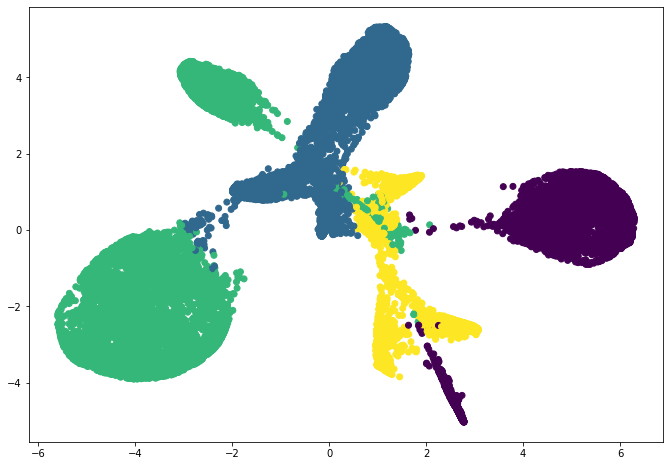

In [38]:
# Create a tsne to visualize the clusters

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2,n_iter=250,perplexity=30,learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

df_sp500e['x'] = transformed_features[:,0]
df_sp500e['y'] = transformed_features[:,1]

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(25)
ax = fig.add_subplot(121)
# ax.tick_params(axis='x', colors='white')  #setting up X-axis tick color to white for dark notebook backgrounds
# ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to white for dark notebook backgrounds

# plt.scatter(df_sp500e['x'], df_sp500e['y']) # run before k-means model completed
plt.scatter(df_sp500e['x'], df_sp500e['y'], c=df_sp500e['class']) # can be run after k-means model is completed
plt.show()

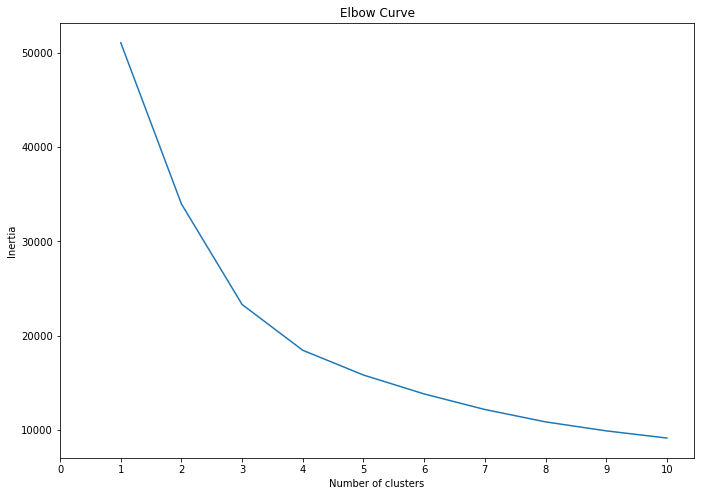

In [25]:
# Run the Cluster Analysis with k-Means

pca = PCA(n_components=2)
stock_pca = pca.fit_transform(scaled_data)

df_stock_pca = pd.DataFrame(
    data=stock_pca, columns=["principal component 1", "principal component 2"]
)


from sklearn.cluster import KMeans

# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(stock_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(25)
ax = fig.add_subplot(121)
# ax.xaxis.label.set_color('white') #setting up X-axis label color to white for dark notebook backgrounds
# ax.yaxis.label.set_color('white') #setting up Y-axis label color to white for dark notebook backgrounds
# ax.tick_params(axis='x', colors='white') #setting up X-axis tick color to white for dark notebook backgrounds
# ax.tick_params(axis='y', colors='white') #setting up Y-axis tick color to white for dark notebook backgrounds

title_obj = plt.title('Elbow Curve') #get the title property handler
# plt.getp(title_obj) #print out the properties of title
plt.getp(title_obj, 'text') #print out the 'text' property for title
# plt.setp(title_obj, color='white') #set the color of title to white for dark notebook backgrounds

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [26]:
# Initializing model with K = 3 (since we already know there are three classes of iris plants)
model = KMeans(n_clusters=4, random_state=5)

In [27]:
# Fitting model
model.fit(df_sp500e)

KMeans(n_clusters=4, random_state=5)

In [28]:
# Get predictions
predictions = model.predict(df_sp500e)
print(predictions)

[2 1 0 ... 3 1 1]


In [29]:
# Add a new class column to df_iris
df_sp500e["class"] = model.labels_
df_sp500e.head()

,pct_dif_1,price_days,atr_pct,volume_pct,volume_days,x,y,class
5554,-0.005161,1.0,0.003440,0.227366,1,2.307662,0.233102,2
5555,-0.008092,1.0,0.003844,0.376840,2,-1.254670,4.297153,1
5556,-0.000578,2.0,0.003702,0.092282,1,-4.834239,-1.163179,0
5557,0.013691,3.0,0.004250,-0.079089,1,-1.683949,-4.711534,0
5558,0.001140,1.0,0.003960,0.179001,2,-1.167210,5.001371,1


In [30]:
df_sp500e.to_csv('df_sp500e.csv')
df_sp500_original.to_csv('df_sp500_original.csv')

In [39]:
df = pd.read_csv('./Inputs/sp500_compiled.csv')
df2 = df[17800:]
df

,Date,Open,High,Low,Close,Adj_Close,Volume,pct_dif_1,price_days,atr_pct,volume_pct,volume_days,x,y,class
0,3/29/1950,17.44,17.44,17.44,17.44,17.44,2090000,-0.005161,1,0.003440,0.227366,1,-1.519527,0.081147,1
1,3/30/1950,17.30,17.30,17.30,17.30,17.30,2370000,-0.008092,1,0.003844,0.376840,2,-0.696895,3.858771,2
2,3/31/1950,17.29,17.29,17.29,17.29,17.29,1880000,-0.000578,2,0.003702,0.092282,1,-2.955089,-4.426664,3
3,4/3/1950,17.53,17.53,17.53,17.53,17.53,1570000,0.013691,3,0.004250,-0.079089,1,5.295177,-1.541167,0
4,4/4/1950,17.55,17.55,17.55,17.55,17.55,2010000,0.001140,1,0.003960,0.179001,2,-0.603226,4.554573,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,12/13/2021,4710.30,4710.30,4667.60,4668.97,4668.97,3322050000,-0.009220,1,0.013460,0.059925,3,1.920847,-2.975711,0
18046,12/14/2021,4642.99,4660.47,4606.52,4634.09,4634.09,3292740000,-0.007527,2,0.013970,0.053268,1,-1.570942,-4.334467,3
18047,12/15/2021,4636.46,4712.60,4611.22,4709.85,4709.85,3367580000,0.016085,3,0.014445,0.075354,2,3.165954,2.751847,0
18048,12/16/2021,4719.13,4731.99,4651.89,4668.67,4668.67,3592810000,-0.008820,1,0.015247,0.145330,3,1.919137,-2.789293,0


In [36]:
df2

,Date,Open,High,Low,Close,Adj_Close,Volume,pct_dif_1,price_days,atr_pct,volume_pct,volume_days,x,y,class
17000,10/18/2017,2562.87,2564.11,2559.67,2561.26,2561.26,2998090000,0.000742,2,0.003524,-0.053289,2,5.587625,1.563106,0
17001,10/19/2017,2553.39,2562.36,2547.92,2562.10,2562.10,2990710000,0.000328,1,0.003624,-0.052797,3,2.319295,-3.707483,0
17002,10/20/2017,2567.56,2575.44,2567.56,2575.21,2575.21,3384650000,0.005091,2,0.003730,0.075438,4,2.036900,0.000270,0
17003,10/23/2017,2578.08,2578.29,2564.33,2564.98,2564.98,3211710000,-0.003988,1,0.003735,0.020937,1,-2.273787,-0.878454,1
17004,10/24/2017,2568.66,2572.18,2565.58,2569.13,2569.13,3427330000,0.001615,2,0.003705,0.089720,2,5.255515,1.661219,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,12/13/2021,4710.30,4710.30,4667.60,4668.97,4668.97,3322050000,-0.009220,1,0.013460,0.059925,3,1.920847,-2.975711,0
18046,12/14/2021,4642.99,4660.47,4606.52,4634.09,4634.09,3292740000,-0.007527,2,0.013970,0.053268,1,-1.570942,-4.334467,3
18047,12/15/2021,4636.46,4712.60,4611.22,4709.85,4709.85,3367580000,0.016085,3,0.014445,0.075354,2,3.165954,2.751847,0
18048,12/16/2021,4719.13,4731.99,4651.89,4668.67,4668.67,3592810000,-0.008820,1,0.015247,0.145330,3,1.919137,-2.789293,0


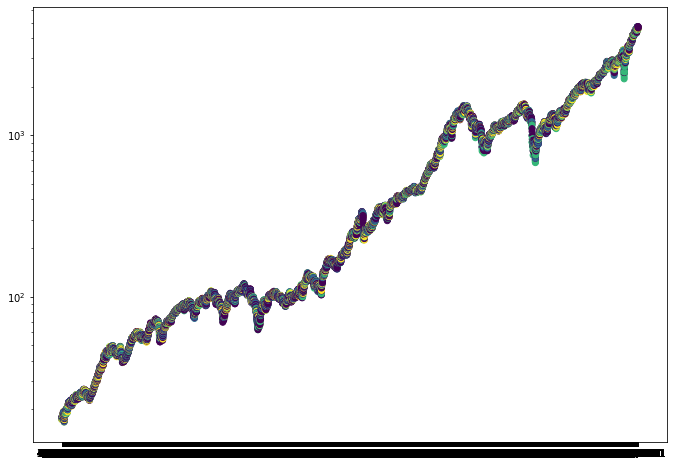

In [33]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(25)
ax = fig.add_subplot(121)
ax.set_yscale('log')
# ax.tick_params(axis='x', colors='white')  #setting up X-axis tick color to white for dark notebook backgrounds
# ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to white for dark notebook backgrounds

# plt.scatter(df_merge3['x'], df_merge3['y']) # run before k-means model completed
plt.scatter(df['Date'], df['Close'], c=df['class']) # can be run after k-means model is completed
plt.show()

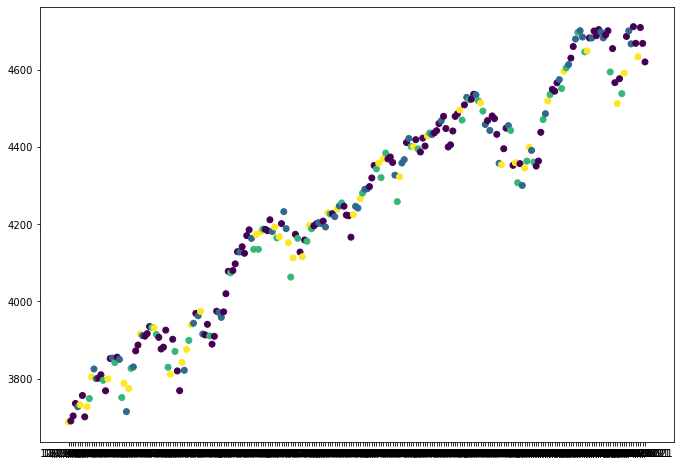

In [40]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(25)
ax = fig.add_subplot(121)
# ax.tick_params(axis='x', colors='white')  #setting up X-axis tick color to white for dark notebook backgrounds
# ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to white for dark notebook backgrounds

# plt.scatter(df_merge3['x'], df_merge3['y']) # run before k-means model completed
plt.scatter(df2['Date'], df2['Close'], c=df2['class']) # can be run after k-means model is completed
plt.show()

# Analysis

I ran unsupervised machine learning model for Treasury rates and SP500 price, volume, and volatility metrics.  The features were optimized using a Kmeans and PCA elbow method down to 5 classes.  The 5 classes are color coded as shown above.  
  
This is how the machine classified the different market regimes based on both the interest rate and SP500 values.  
  
This model can predict if we are changing regimes. It doesn't appear to be useful for price prediction, looks like correlations have broken down and changed over time.  
  
The goal is to be able to detect when market regimes are changing to be able to position our portfolios accordingly.  
  
The purple may correlate to accomodative Fed policy, looks like it has initiated accomodative policy during crises in the past, but later just kept on the accomodation.  
  
Teal is a recovery period.  
  
Green looks like healthy behavior.  
It's unclear what yellow is but it has been identified as different from the other previous classes. Yellow appears to correlate with the period from 2004. We may be in for a similar market as the 2004 to 2007 period. But we have just flipped green, the same as what happened in 2007. This could signify a turning point.  
  
Blue may just be a different regime for higher interest rates.  